#The goal of this project is to create a simple personal expense tracker using Python and Pandas in a Jupyter Notebook. By analyzing monthly expenses, users will gain insights into their spending habits and identify key areas where their money goes.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use("default")
sns.set_palette("husl")

In [5]:
expenses_df=pd.read_csv("expenses_dataset.csv")
expenses_df.head()

,Date,Description,Category,Amount
0,1/5/2024,Grocery Store,Food,45.50
1,1/8/2024,Gas Station,Transportation,35.25
2,1/10/2024,Monthly Rent,Rent,1200.00
3,1/12/2024,Restaurant,Food,67.80
4,1/15/2024,Electricity,Utilities,89.45


In [6]:
expenses_df["Date"]=pd.to_datetime(expenses_df["Date"])

In [8]:
print("Sampleof Expense Data:")
print(expenses_df.head(10))
print(f"\nTotal number of expenses:  {len(expenses_df)}")

Sampleof Expense Data:
        Date       Description        Category   Amount
0 2024-01-05     Grocery Store            Food    45.50
1 2024-01-08       Gas Station  Transportation    35.25
2 2024-01-10      Monthly Rent            Rent  1200.00
3 2024-01-12        Restaurant            Food    67.80
4 2024-01-15       Electricity       Utilities    89.45
5 2024-01-18            Movies   Entertainment    25.00
6 2024-01-20  Public Transport  Transportation    15.50
7 2024-01-22          Clothing        Shopping    89.99
8 2024-01-25       Coffee Shop            Food    12.75
9 2024-01-28      Doctor Visit      Healthcare    75.00

Total number of expenses:  33


In [9]:
print("DataFrame Info:")
print(expenses_df.info())
print("\nDataFrame Decription:")
print(expenses_df.describe())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         33 non-null     datetime64[ns]
 1   Description  33 non-null     object        
 2   Category     33 non-null     object        
 3   Amount       33 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.2+ KB
None

DataFrame Decription:
                                Date       Amount
count                             33    33.000000
mean   2024-02-17 00:43:38.181818112   159.574545
min              2024-01-05 00:00:00    12.750000
25%              2024-01-25 00:00:00    34.990000
50%              2024-02-18 00:00:00    52.300000
75%              2024-03-10 00:00:00    89.450000
max              2024-03-30 00:00:00  1200.000000
std                              NaN   335.572713


In [11]:
print(f"\nAmount column data type: {expenses_df['Amount'].dtype}")
print(f"Is Amount column numeric? {pd.api.types.is_numeric_dtype(expenses_df['Amount'])}")


Amount column data type: float64
Is Amount column numeric? True


In [12]:
print(f"\nMissing values in each column:")
print(expenses_df.isnull().sum())


Missing values in each column:
Date           0
Description    0
Category       0
Amount         0
dtype: int64


In [14]:
print(f"\nUnique values in Category column: {expenses_df['Category'].unique()}")
print(expenses_df["Category"].unique())


Unique values in Category column: ['Food' 'Transportation' 'Rent' 'Utilities' 'Entertainment' 'Shopping'
 'Healthcare']
['Food' 'Transportation' 'Rent' 'Utilities' 'Entertainment' 'Shopping'
 'Healthcare']


In [15]:
total_expenses=expenses_df["Amount"].sum()
print(f"Total expenses: ${total_expenses:,.2f}")

Total expenses: $5,265.96


In [18]:
monthly_totals=expenses_df.groupby(expenses_df["Date"].dt.to_period("M"))["Amount"].sum()
print(f"\nmonthly_Expenses:")
for month, amount in monthly_totals.items():
    print(f"{month}: ${amount:,.2f}")



monthly_Expenses:
2024-01: $1,656.24
2024-02: $1,693.98
2024-03: $1,915.74


In [19]:
Category_spending=expenses_df.groupby("Category")["Amount"].sum().sort_values(ascending=False)
print(f"\nCategory Spending:")
for category, amount in Category_spending.items():
    print(f"{category}: ${amount:,.2f}")


Category Spending:
Rent: $3,600.00
Food: $395.34
Shopping: $349.73
Utilities: $285.25
Transportation: $273.15
Healthcare: $227.50
Entertainment: $134.99


In [22]:
largest_expense=expenses_df.loc[expenses_df["Amount"].idxmax()]
print(f"\nLargest Expense:")
print(f"Date: {largest_expense['Date'].strftime("%Y-%m-%d")}")
print(f"Description: {largest_expense['Description']}")
print(f"Category: {largest_expense['Category']}")
print(f"Amount: ${largest_expense['Amount']:,.2f}")


Largest Expense:
Date: 2024-01-10
Description: Monthly Rent
Category: Rent
Amount: $1,200.00


In [24]:
category_percentage=(Category_spending/total_expenses*100).round(2)
print("Spending Percentage by Category:")
for category, percentage in category_percentage.items():
    print(f"{category}: {percentage}%")

Spending Percentage by Category:
Rent: 68.36%
Food: 7.51%
Shopping: 6.64%
Utilities: 5.42%
Transportation: 5.19%
Healthcare: 4.32%
Entertainment: 2.56%


In [26]:
monthly_category = expenses_df.groupby([expenses_df["Date"].dt.to_period("M"), "Category"])["Amount"].sum().unstack(fill_value=0)
print(f"\nMonthly Spending by Category:")
print(monthly_category)


Monthly Spending by Category:
Category  Entertainment    Food  Healthcare    Rent  Shopping  Transportation  \
Date                                                                            
2024-01           25.00  126.05        75.0  1200.0     89.99           50.75   
2024-02           14.99  114.45        32.5  1200.0    149.99           71.25   
2024-03           95.00  154.84       120.0  1200.0    109.75          151.15   

Category  Utilities  
Date                 
2024-01       89.45  
2024-02      110.80  
2024-03       85.00  


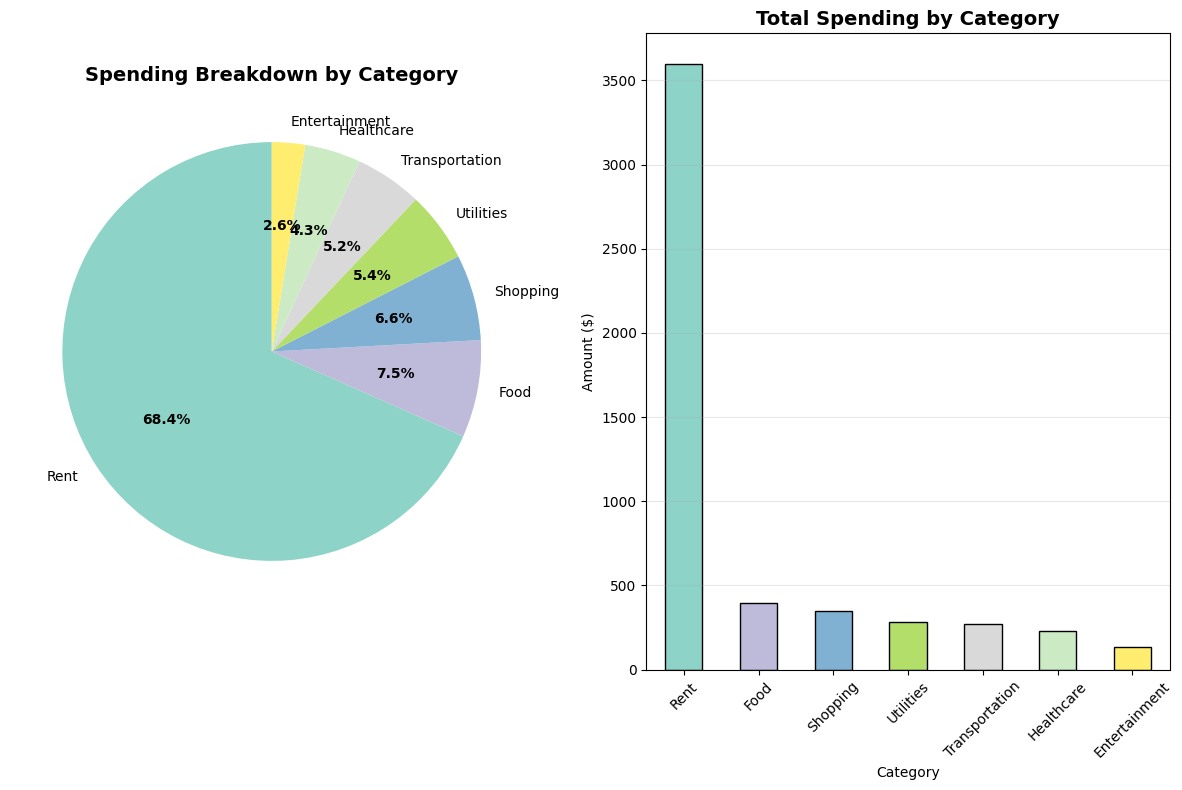

In [28]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
colors=plt.cm.Set3(np.linspace(0,1,len(Category_spending)))
wedges,texts,autotexts=plt.pie(Category_spending.values,labels=Category_spending.index,
                               autopct="%1.1f%%",colors=colors,
startangle=90)
plt.title("Spending Breakdown by Category",fontsize=14,fontweight="bold")
for autotext in autotexts:
    autotext.set_color("black")
    autotext.set_fontweight("bold")

plt.subplot(1,2,2)
Category_spending.plot(kind="bar",color=colors,edgecolor="black")
plt.title("Total Spending by Category",fontsize=14,fontweight="bold")
plt.xlabel("Category")
plt.ylabel("Amount ($)")
plt.xticks(rotation=45)
plt.grid(axis="y",alpha=0.3)
plt.tight_layout()
plt.show()

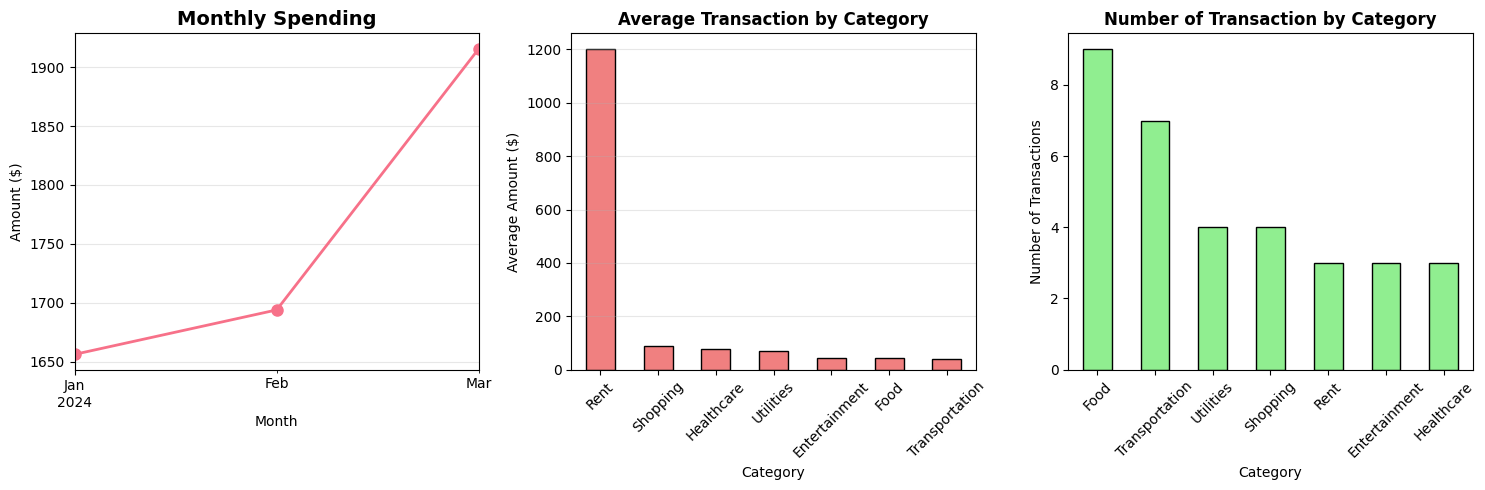

In [29]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
monthly_totals.plot(kind="line",marker="o",linewidth=2,markersize=8)
plt.title("Monthly Spending",fontsize=14,fontweight="bold")
plt.xlabel("Month")
plt.ylabel("Amount ($)")
plt.grid(True,alpha=0.3)

plt.subplot(1,3,2)
avg_spending=expenses_df.groupby("Category")["Amount"].mean().sort_values(ascending=False)
avg_spending.plot(kind="bar",color="lightcoral",edgecolor="black")
plt.title("Average Transaction by Category",fontweight="bold")
plt.xlabel("Category")
plt.ylabel("Average Amount ($)")
plt.xticks(rotation=45)
plt.grid(axis="y",alpha=0.3)

plt.subplot(1,3,3)
transaction_count=expenses_df["Category"].value_counts()
transaction_count.plot(kind="bar",color="lightgreen",edgecolor="black")
plt.title("Number of Transaction by Category",fontweight="bold")
plt.xlabel("Category")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [32]:
print("=" *60)nt("=" *60)
print(f"\n OVERALL SPENDINGS:")
print(f"Total Expenses (3 months): ${total_expenses:,.2f}")
print(f"Average Month
print("PERSONAL EXPENSES TRACKER - ANALYSIS SUMMARY")
prily Spending: ${monthly_totals.mean():,.2f}")
print(f"Total Number of Transactions: {len(expenses_df)}")
print(f"Average Transaction Amount: ${expenses_df['Amount'].mean():,.2f}")

PERSONAL EXPENSES TRACKER - ANALYSIS SUMMARY

 OVERALL SPENDINGS:
Total Expenses (3 months): $5,265.96
Average Monthly Spending: $1,755.32
Total Number of Transactions: 33
Average Transaction Amount: $159.57


In [35]:
print("=" *60)
print("PERSONAL EXPENSES TRACKER - ANALYSIS SUMMARY")
print("=" *60)
print(f"\n OVERALL SPENDINGS:")
print(f"Total Expenses (3 months): ${total_expenses:,.2f}")
print(f"Average Monthly Spending: ${monthly_totals.mean():,.2f}")
print(f"Total Number of Transactions: {len(expenses_df)}")
print(f"Average Transaction Amount: ${expenses_df['Amount'].mean():,.2f}")
print(f"\n TOP SPENDING CATEGORIES:")
top_3_categories=Category_spending.head(3)
for i ,(category, amount) in enumerate(top_3_categories.items(),1):
    percentage=(amount/total_expenses*100)
    print(f"{i}. {category} : ${amount:,.2f} ({percentage:.1f}%)")
print(f"\nLARGEST SINGLE EXPENSE:")
print(f"• Amount: ${largest_expense['Amount']:,.2f}")
print(f"• Category:{largest_expense["Category"]}")
print(f"• Description: {largest_expense['Description']}")
print(f"• Date: {largest_expense['Date'].strftime('%B-%d-%Y')}")

print(f"\nMONTHLY SPENDING TREND:")
for month, amount in monthly_totals.items():
    print(f"•{month}: ${amount:,.2f}")

PERSONAL EXPENSES TRACKER - ANALYSIS SUMMARY

 OVERALL SPENDINGS:
Total Expenses (3 months): $5,265.96
Average Monthly Spending: $1,755.32
Total Number of Transactions: 33
Average Transaction Amount: $159.57

 TOP SPENDING CATEGORIES:
1. Rent : $3,600.00 (68.4%)
2. Food : $395.34 (7.5%)
3. Shopping : $349.73 (6.6%)

LARGEST SINGLE EXPENSE:
• Amount: $1,200.00
• Category:Rent
• Description: Monthly Rent
• Date: January-10-2024

MONTHLY SPENDING TREND:
•2024-01: $1,656.24
•2024-02: $1,693.98
•2024-03: $1,915.74


In [38]:
print(f"\n KEY INSIGHTS:")
highest_category=Category_spending.index[0]
highest_percentage=category_percentage.iloc[0]
lowest_category=Category_spending.index[-1]

print(f"1. {highest_category} is your largest expense category, accounting for{highest_percentage}% of total spending.")
print(f"2. Your fixed expenses (Rent + Utilities) account for{(category_percentage["Rent"]+category_percentage["Utilities"]):.1f}% of total spending.")
print(f"3. Consider reviewing spending in {highest_category} for potential savings opportunities.")
print(f"4.{lowest_category}has the lowest spending, indicating good control in this area.")


 KEY INSIGHTS:
1. Rent is your largest expense category, accounting for68.36% of total spending.
2. Your fixed expenses (Rent + Utilities) account for73.8% of total spending.
3. Consider reviewing spending in Rent for potential savings opportunities.
4.Entertainmenthas the lowest spending, indicating good control in this area.
